In [79]:
# Import all necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# Get the response from the Census API
key = '1a3f83be0b86cf8c738d2833cd8a386aee5b3c5c'
url = f'https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,TECHUSE,TECHUSE_LABEL,FACTORS_U,FACTORS_U_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*&key={key}'
response_tcb = requests.get(url)

In [168]:
# Confirm that response is valid
print(response_tcb.status_code)

200


In [169]:
# Load response data into pandas DataFrame
json = response_tcb.json()
df_tcb = pd.DataFrame(json[1:], columns=json[0])

In [170]:
# Get some basic details about our DataFrame
print(df_tcb.shape)
print(df_tcb.info())
print(df_tcb.head())
print(df_tcb.tail())

(9500, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO_ID             9500 non-null   object
 1   NAME               9500 non-null   object
 2   NAICS2017          9500 non-null   object
 3   NAICS2017_LABEL    9500 non-null   object
 4   SEX                9500 non-null   object
 5   SEX_LABEL          9500 non-null   object
 6   ETH_GROUP          9500 non-null   object
 7   ETH_GROUP_LABEL    9500 non-null   object
 8   RACE_GROUP         9500 non-null   object
 9   RACE_GROUP_LABEL   9500 non-null   object
 10  VET_GROUP          9500 non-null   object
 11  VET_GROUP_LABEL    9500 non-null   object
 12  NSFSZFI            9500 non-null   object
 13  NSFSZFI_LABEL      9500 non-null   object
 14  TECHUSE            9500 non-null   object
 15  TECHUSE_LABEL      9500 non-null   object
 16  FACTORS_U          9500 non-nul

In [171]:
# We don't actually want all of this data, just the more readable columns, so we filter the columns
tcb = df_tcb[['GEO_ID','NAME','NAICS2017_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','NSFSZFI_LABEL','TECHUSE','TECHUSE_LABEL','FACTORS_U','FACTORS_U_LABEL','FIRMPDEMP','RCPPDEMP','EMP','PAYANN']]

In [172]:
# Those same details, now on our filtered data
print(df_tcb.shape)
print(df_tcb.info())
print(df_tcb.head())
print(df_tcb.tail())

(9500, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO_ID             9500 non-null   object
 1   NAME               9500 non-null   object
 2   NAICS2017          9500 non-null   object
 3   NAICS2017_LABEL    9500 non-null   object
 4   SEX                9500 non-null   object
 5   SEX_LABEL          9500 non-null   object
 6   ETH_GROUP          9500 non-null   object
 7   ETH_GROUP_LABEL    9500 non-null   object
 8   RACE_GROUP         9500 non-null   object
 9   RACE_GROUP_LABEL   9500 non-null   object
 10  VET_GROUP          9500 non-null   object
 11  VET_GROUP_LABEL    9500 non-null   object
 12  NSFSZFI            9500 non-null   object
 13  NSFSZFI_LABEL      9500 non-null   object
 14  TECHUSE            9500 non-null   object
 15  TECHUSE_LABEL      9500 non-null   object
 16  FACTORS_U          9500 non-nul

In [188]:
# Convert columns to numeric types, so we can do math with them!
tcb = tcb.astype({'FIRMPDEMP':int, 'RCPPDEMP':'int64', 'PAYANN':'int64'})

# This is where we filter the responses we want to look at
# Filtering by owner's sex
data = tcb.loc[tcb['SEX_LABEL'] == 'Total']
# Filtering by owner's ethnicity
data = data.loc[data['ETH_GROUP_LABEL'] == 'Total']
# Filtering by owner's race
data = data.loc[data['RACE_GROUP_LABEL'] == 'Total']
# Filtering by owner's veteran status
data = data.loc[data['VET_GROUP_LABEL'] == 'Total']
# Filtering by business size 
data = data.loc[data['NSFSZFI_LABEL'] == 'All firms']
# Filtering by business type
data = data.loc[data['NAICS2017_LABEL'] == 'Professional, scientific, and technical services']
# Filter by question response for Factors
'''
data = data[~data['FACTORS_U_LABEL'].str.contains("Total Reporting")]
data = data[~data['FACTORS_U_LABEL'].str.contains("not applicable")]
data = data[~data['FACTORS_U_LABEL'].str.contains("No factors")]

# Filtering out specific response sets into their own datasets
robo_data = data[data['FACTORS_U_LABEL'].str.contains("Robotics")]
ai_data = data[data['FACTORS_U_LABEL'].str.contains("Artificial Intelligence")]
cloud_data = data[data['FACTORS_U_LABEL'].str.contains("Cloud-Based")]
exp_data = data[data['FACTORS_U_LABEL'].str.contains("too expensive")]
'''


# Filter by question response for Tech Use

data = data[~data['TECHUSE_LABEL'].str.contains("Low use")]
data = data[~data['TECHUSE_LABEL'].str.contains("Moderate use")]
data = data[~data['TECHUSE_LABEL'].str.contains("High use")]
data = data[~data['TECHUSE_LABEL'].str.contains("Don't know")]
data = data[~data['TECHUSE_LABEL'].str.contains("Total Reporting")]

# Filtering out specific response sets into their own datasets
robo_data = data[data['TECHUSE_LABEL'].str.contains("Robotics")]
ai_data = data[data['TECHUSE_LABEL'].str.contains("Artificial Intelligence")]
cloud_data = data[data['TECHUSE_LABEL'].str.contains("Cloud-Based")]
exp_data = data[~data['TECHUSE_LABEL'].str.contains("Tested")]


In [106]:
print(data.shape)
print(data.info())
print(data.head())
print(data.tail())

(40, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 4986 to 5037
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   GEO_ID            40 non-null     object
 1   NAME              40 non-null     object
 2   NAICS2017_LABEL   40 non-null     object
 3   SEX_LABEL         40 non-null     object
 4   ETH_GROUP_LABEL   40 non-null     object
 5   RACE_GROUP_LABEL  40 non-null     object
 6   VET_GROUP_LABEL   40 non-null     object
 7   NSFSZFI_LABEL     40 non-null     object
 8   FACTORS_U         40 non-null     object
 9   FACTORS_U_LABEL   40 non-null     object
 10  TECHUSE_LABEL     40 non-null     object
 11  FIRMPDEMP         40 non-null     int32 
 12  RCPPDEMP          40 non-null     int64 
 13  EMP               40 non-null     object
 14  PAYANN            40 non-null     int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 4.8+ KB
None
         GEO_ID           NAME  \
4

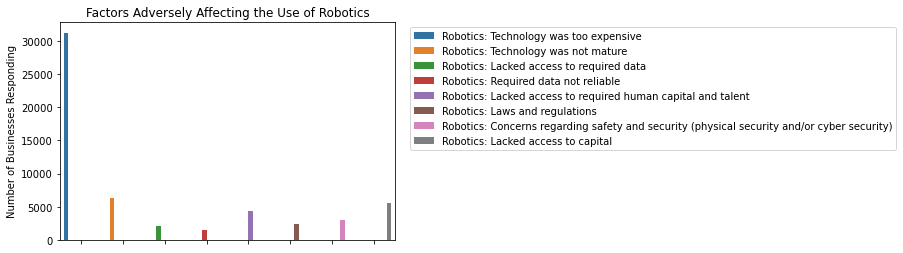

In [182]:
# Creating a bar graph of robotics factors data
robotics = sns.barplot(x="FACTORS_U", y="FIRMPDEMP", hue="FACTORS_U_LABEL", data=robo_data)
robotics.set(ylabel="Number of Businesses Responding", xlabel="", title="Factors Adversely Affecting the Use of Robotics")
robotics.set(xticklabels=[])
robotics.legend(bbox_to_anchor=(1.03, 1))

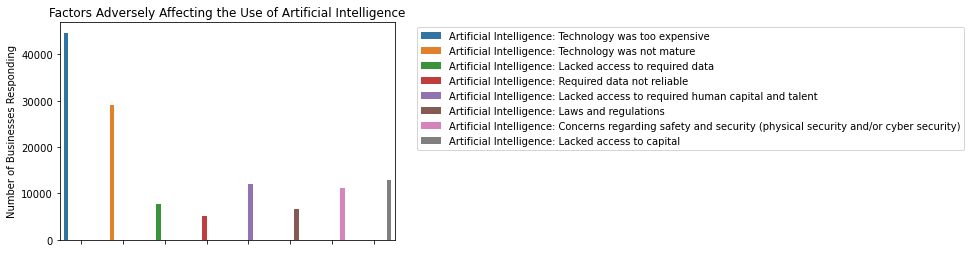

In [183]:
# Creating a bar graph of artificial intelligence factors data
ai = sns.barplot(x="FACTORS_U", y="FIRMPDEMP", hue="FACTORS_U_LABEL", data=ai_data)
ai.set(ylabel="Number of Businesses Responding", xlabel="", title="Factors Adversely Affecting the Use of Artificial Intelligence")
ai.set(xticklabels=[])
ai.legend(bbox_to_anchor= (1.05, 1))

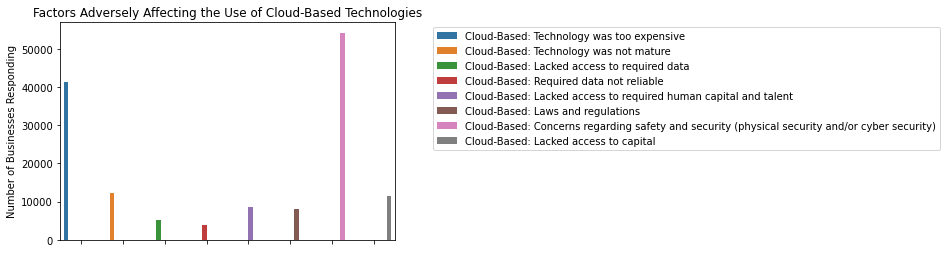

In [184]:
# Creating a bar graph of cloud-based factors data
cloud = sns.barplot(x="FACTORS_U", y="FIRMPDEMP", hue="FACTORS_U_LABEL", data=cloud_data)
cloud.set(ylabel="Number of Businesses Responding", xlabel="", title="Factors Adversely Affecting the Use of Cloud-Based Technologies")
cloud.set(xticklabels=[])
cloud.legend(bbox_to_anchor=(1.1, 1))

In [185]:
# Computing columns for average pay and average revenue
exp_data = exp_data.copy()
exp_data["AVG_REV"] = exp_data["RCPPDEMP"] / exp_data["FIRMPDEMP"]
exp_data["AVG_PAY"] = exp_data["PAYANN"] / exp_data["FIRMPDEMP"]

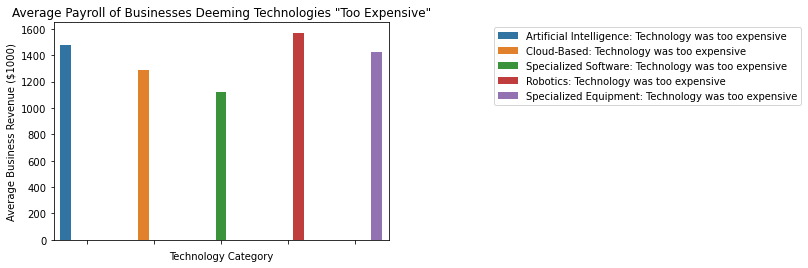

In [186]:
# Creating a bar graph of expense-based data
exp = sns.barplot(x="FACTORS_U", y="AVG_PAY", hue="FACTORS_U_LABEL", data=exp_data)
exp.set(ylabel="Average Business Revenue ($1000)", xlabel="Technology Category", title='Average Payroll of Businesses Deeming Technologies "Too Expensive"')
exp.set(xticklabels=[])
exp.legend(bbox_to_anchor=(1.3, 1))

In [139]:
print(data['TECHUSE_LABEL'].unique())

['Artificial Intelligence: Tested, but did not use in production or service'
 'Artificial Intelligence: Did not use'
 'Artificial Intelligence: Total use'
 'Artificial Intelligence: Total Reporting' 'Cloud-Based: Did not use'
 'Cloud-Based: Tested, but did not use in production or service'
 'Cloud-Based: Total use' 'Cloud-Based: Total Reporting'
 'Specialized Software: Did not use'
 'Specialized Software: Tested, but did not use in production or service'
 'Specialized Software: Total use' 'Specialized Software: Total Reporting'
 'Robotics: Did not use'
 'Robotics: Tested, but did not use in production or service'
 'Robotics: Total use' 'Robotics: Total Reporting'
 'Specialized Equipment: Did not use'
 'Specialized Equipment: Tested, but did not use in production or service'
 'Specialized Equipment: Total use'
 'Specialized Equipment: Total Reporting']


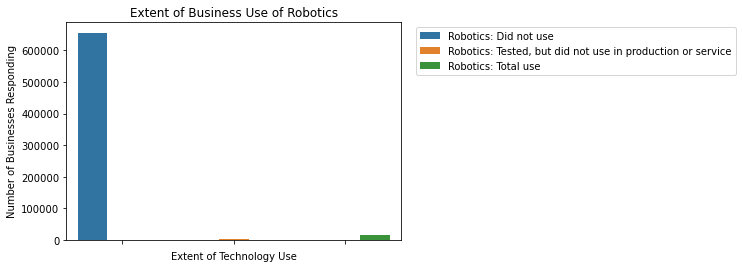

In [189]:
# Creating a bar graph of robotics use data
robotics = sns.barplot(x="TECHUSE", y="FIRMPDEMP", hue="TECHUSE_LABEL", data=robo_data)
robotics.set(ylabel="Number of Businesses Responding", xlabel="Extent of Technology Use", title="Extent of Business Use of Robotics")
robotics.set(xticklabels=[])
robotics.legend(bbox_to_anchor=(1.03, 1))

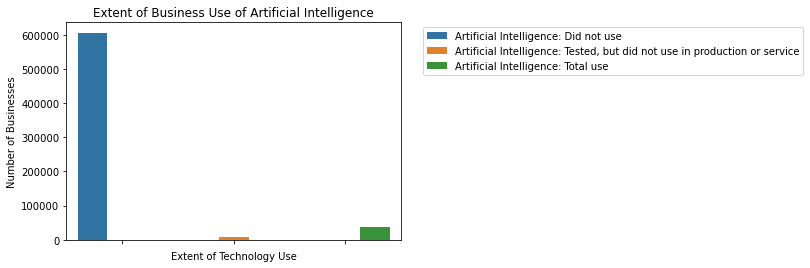

In [179]:
# Creating a bar graph of artificial intelligence use data
ai_data = ai_data.sort_values(by='TECHUSE_LABEL')
ai = sns.barplot(x="TECHUSE", y="FIRMPDEMP", hue="TECHUSE_LABEL", data=ai_data)
ai.set(ylabel="Number of Businesses", xlabel="Extent of Technology Use", title="Extent of Business Use of Artificial Intelligence")
ai.set(xticklabels=[])
ai.legend(bbox_to_anchor= (1.05, 1))

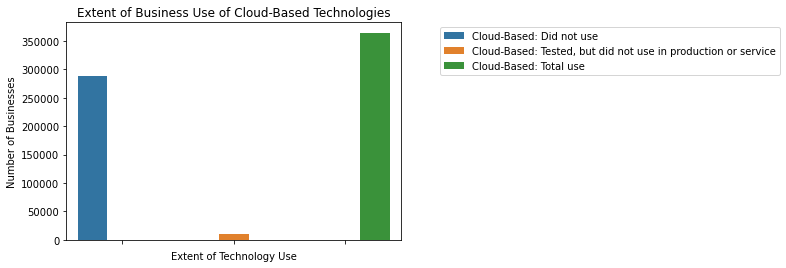

In [190]:
# Creating a bar graph of cloud-based use data
cloud = sns.barplot(x="TECHUSE", y="FIRMPDEMP", hue="TECHUSE_LABEL", data=cloud_data)
cloud.set(ylabel="Number of Businesses", xlabel="Extent of Technology Use", title="Extent of Business Use of Cloud-Based Technologies")
cloud.set(xticklabels=[])
cloud.legend(bbox_to_anchor=(1.1, 1))

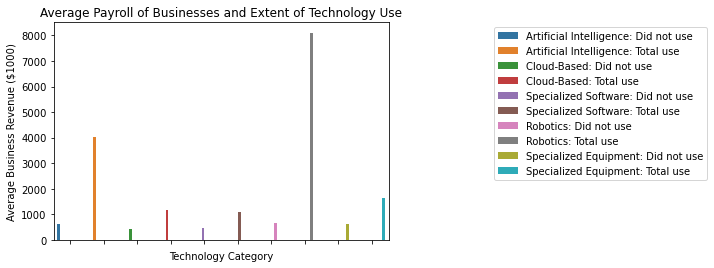

In [177]:
# Creating a bar graph of payroll and use data
exp = sns.barplot(x="TECHUSE", y="AVG_PAY", hue="TECHUSE_LABEL", data=exp_data)
exp.set(ylabel="Average Business Revenue ($1000)", xlabel="Extent of Technology Use", title='Average Payroll of Businesses and Extent of Technology Use')
exp.set(xticklabels=[])
exp.legend(bbox_to_anchor=(1.3, 1))